In [1]:
# Matplotlib inline magic command
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import statistics 
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read CSV files and create dataframes
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Inspect city data dataframe
# Get the count of values in the data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Inspect city data dataframe
# Get the count of null values 
city_data_df.isnull().sum()


city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Inspect city data dataframe
# Get the dataypes in the dataframe
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Inspect city data dataframe
# Get how many data points there are for each type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Number of data points for urban city types 
sum(city_data_df['type']=='Urban')

66

In [11]:
# Number of data points for suburban city types 
sum(city_data_df['type']=='Suburban')

36

In [12]:
# Number of data points for rural city types 
sum(city_data_df['type']=='Rural')

18

In [13]:
# Inspect the ride data DataFrame
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
# Merge the dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on = ['city', 'city'])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [106]:
# Create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']

urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [18]:
# Create Suburban and Rural city dataframes
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']

rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']


In [19]:
# Get the number of rides for each city in each city type dataframe
urban_ride_count =urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count =suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count =rural_cities_df.groupby(['city']).count()['ride_id']


In [20]:
# Get the average fare for each city in each city type dataframe
urban_avg_fare=urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare=rural_cities_df.groupby(['city']).mean()['fare']


In [21]:
# Get the average number of drivers for each city in each city type dataframe
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count =suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count =rural_cities_df.groupby(['city']).mean()['driver_count']


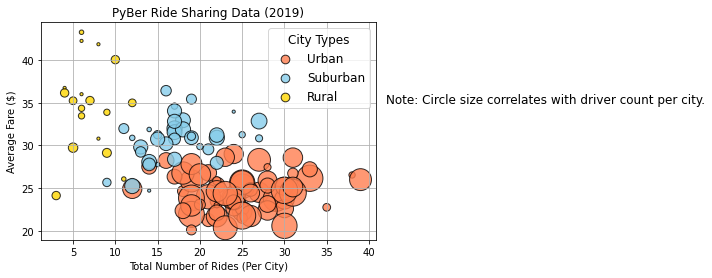

In [22]:
# Scatter Plot for Urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10 * urban_driver_count,
            color = 'coral',
            edgecolors = 'k',
            linewidth = 1, 
            alpha = 0.8, 
            label='Urban')

# Scatter Plot for Suburban Cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s= 10*suburban_driver_count, 
            color='skyblue', 
            edgecolors='k', 
            alpha=0.8, 
            linewidth=1, label = 'Suburban')

# Scatter Plot for Rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, 
            color = 'gold', 
            edgecolors='k', 
            linewidth =1, 
            alpha = 0.8, label = 'Rural')

plt.title('PyBer Ride Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Create the legend 
lgnd = plt.legend(fontsize= '12', 
                  mode='expanded', scatterpoints=1, 
                  loc='best', title ='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text label about marker size
plt.text(42,35, 'Note: Circle size correlates with driver count per city.', fontsize='12')

# Save the figure
plt.savefig('analysis/Fig1.png')


In [23]:
# Get Summary Statistics 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [24]:
# Get Summary Statistics 
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [25]:
# Get Summary Statistics 
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [26]:
# Get Summary Statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [27]:
# Get Summary Statistics
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [28]:
# Get Summary Statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [30]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [31]:
# Calculate the mode of the ride count for each city type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [32]:
# Calculate the measures of central tendeny for the ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for the urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for the urban trips is {mode_urban_ride_count}.')



The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for the urban trips is 24.0.
The mode for the ride counts for the urban trips is ModeResult(mode=array([22]), count=array([7])).


In [33]:
# Calculate the measures of central tendeny for the ride count for suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for the ride counts for the suburban trips is {median_suburban_ride_count}.')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts for the suburban trips is {mode_suburban_ride_count}.')




The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for the suburban trips is 17.0.
The mode for the ride counts for the suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [34]:
# Calculate the measures of central tendeny for the ride count for rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts for the rural trips is {median_rural_ride_count}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for the rural trips is {mode_rural_ride_count}.')




The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for the rural trips is 6.0.
The mode for the ride counts for the rural trips is ModeResult(mode=array([6]), count=array([5])).


In [35]:
# Get the fares for the urban cities
urban_fares = urban_cities_df ['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [36]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [37]:
# Get the fares for the suburban cities
suburban_fares = suburban_cities_df ['fare']
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [38]:
# Get the fares for the urban cities
rural_fares = rural_cities_df ['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [39]:
# Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for suburban trips is ${median_suburban_fares:.2f}.')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is ${mode_suburban_fares}.')


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [40]:
# Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural trips is ${median_rural_fares:.2f}.')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is ${mode_rural_fares}.')



The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [41]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [46]:
# Calculate the measures of central tendency for the average driver count for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean driver count for each urban city is {mean_urban_drivers:.0f}.')

median_urban_drivers = np.median(urban_drivers)
print(f'The median fare price for urban trips is {median_urban_drivers:.2f}.')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode fare price for urban trips is {mode_urban_drivers}.')


The mean driver count for each urban city is 37.
The median fare price for urban trips is 37.00.
The mode fare price for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [47]:
# Calculate the measures of central tendency for the average driver count for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean driver count for each suburban city is {mean_suburban_drivers:.0f}.')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median driver count for each suburban city is {median_suburban_drivers:.2f}.')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode driver count for each suburban city is {mode_suburban_drivers}.')



The mean driver count for each suburban city is 14.
The median driver count for each suburban city is 16.00.
The mode driver count for each suburban city is ModeResult(mode=array([20]), count=array([79])).


In [48]:
# Calculate the measures of central tendency for the average driver count for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean driver count for each rural city is {mean_rural_drivers:.0f}.')

median_rural_drivers = np.median(rural_drivers)
print(f'The median driver count for each rural city is {median_rural_drivers:.2f}.')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode driver count for each rural city is {mode_rural_drivers}.')



The mean driver count for each rural city is 4.
The median driver count for each rural city is 4.00.
The mode driver count for each rural city is ModeResult(mode=array([1]), count=array([32])).


<function matplotlib.pyplot.show(close=None, block=None)>

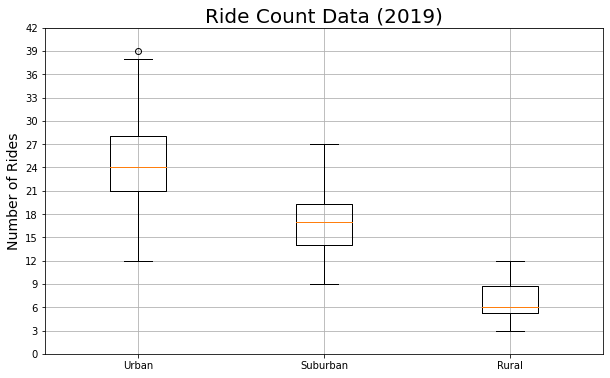

In [54]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(ride_count_data, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

# Save the Figure
plt.savefig('Analysis/Fig2.png')
plt.show

In [55]:
# Find the urban city that matches numbers of rides = 39
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')


West Angela has the highest rider count.


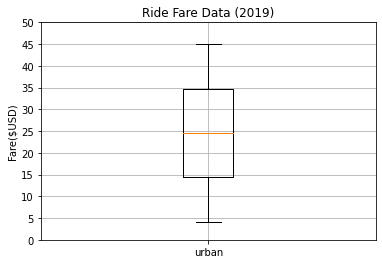

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [56]:
# Create a box and whisker plot for the urban fare data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

# Add the title, y_axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()

print('Summary Statistics')
urban_fares.describe()


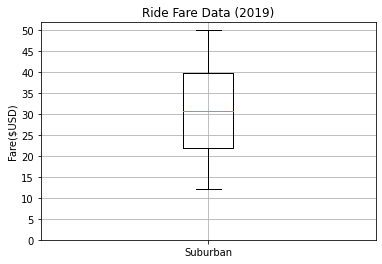

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [57]:
# Create a box and whisker plot for the urban fare data
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)

# Add the title, y_axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()

print('Summary Statistics')
suburban_fares.describe()



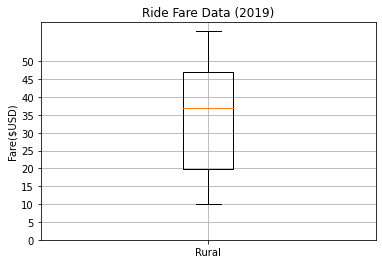

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [58]:
# Create a box and whisker plot for the urban fare data
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)

# Add the title, y_axis label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()

print('Summary Statistics')
rural_fares.describe()



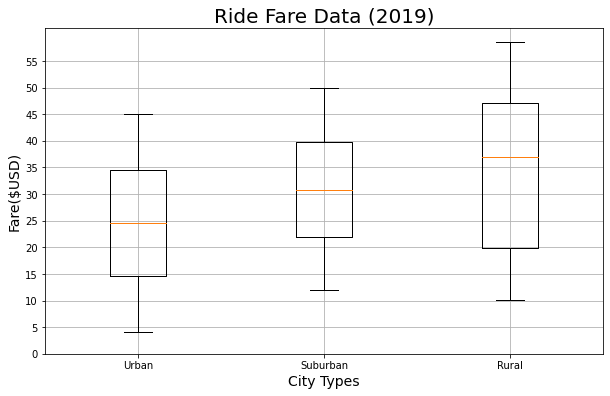

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [61]:
# Create a box-and-whisker plot for each cities ride fare data
x_labels = ['Urban', 'Suburban', 'Rural']
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(fares_data, labels=x_labels)

# Add the title, y_axis label, and grid
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 60, step = 5.0))
ax.grid()
plt.show()

# Save the Figure
plt.savefig('Analysis/Fig3.png')
plt.show

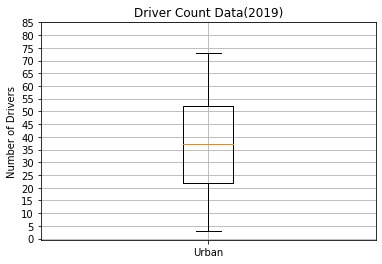

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [65]:
# Create the box and whisker plot for the urban driver count data

x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()


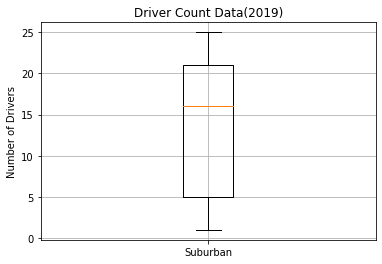

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [69]:
# Create the box and whisker plot for the suburban driver count data

x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburban_drivers.describe()



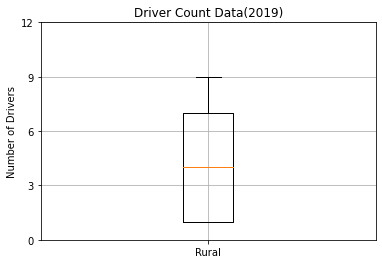

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [68]:
# Create the box and whisker plot for the rural driver count data

x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 15, step=3.0))
ax.grid()
plt.show()
print('Summary Statistics')
rural_drivers.describe()



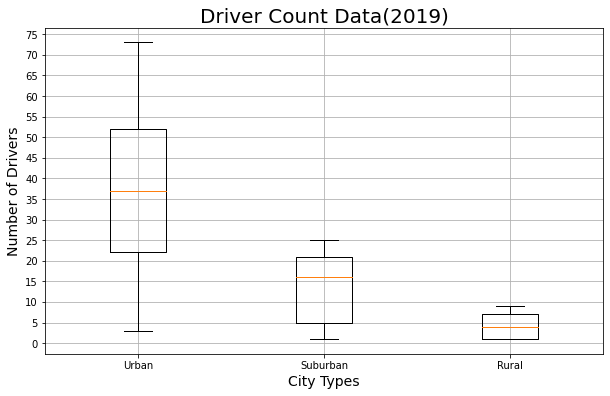

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [73]:
# Create a box-and-whisker plot for each cities driver count
x_labels = ['Urban', 'Suburban', 'Rural']
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(drivers_data, labels=x_labels)

# Add the title, y_axis label, and grid
ax.set_title('Driver Count Data(2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 76, step = 5.0))
ax.grid()
plt.show()

# Save the Figure
plt.savefig('Analysis/Fig4.png')
plt.show

In [74]:
# Get the total fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [75]:
# Get the sum of all the fares
total_fares = pyber_data_df['fare'].sum()
total_fares


63538.64

In [76]:
# Calculate the percentage of fare for each city type
type_percents = 100* sum_fares_by_type / total_fares
type_percents


type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

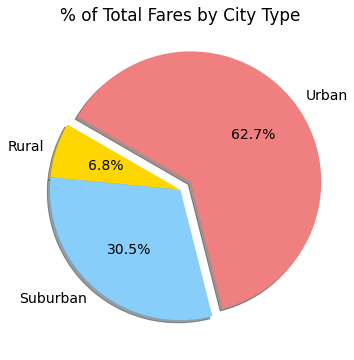

In [88]:
# Import new dependencies
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode = [0, 0, 0.1], 
        autopct = '%1.1f%%', 
        shadow = True, startangle = 150)
plt.title('% of Total Fares by City Type')

# Change the defualt font size
mpl.rcParams['font.size']= 14

# Save and show the image
plt.savefig('Analysis/Fig5.png')
plt.show()


In [97]:
# Get the total number of rides for each city type
count_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
count_rides_by_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [94]:
# Get the count of all the rides
total_rides = pyber_data_df['ride_id'].count()
total_rides



2375

In [96]:
# Calculate the percentage of rides for each city type
ride_percents = 100 * count_rides_by_type/total_rides
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

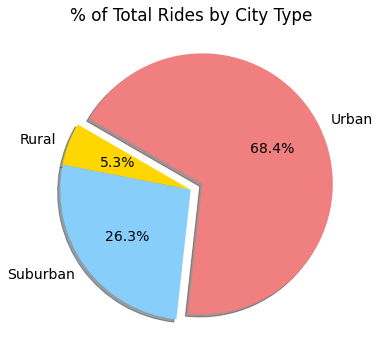

In [98]:
# Build the percentage of rides by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode = [0, 0, 0.1], 
        autopct = '%1.1f%%', 
        shadow = True, startangle = 150)
plt.title('% of Total Rides by City Type')

# Change the defualt font size
mpl.rcParams['font.size']= 14

# Save and show the image
plt.savefig('Analysis/Fig6.png')
plt.show()

In [104]:
# Calculate the percentage of drivers for each city type
driver_percents = 100 *city_data_df.groupby(['type']).sum()['driver_count'] / city_data_df['driver_count'].sum()

driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

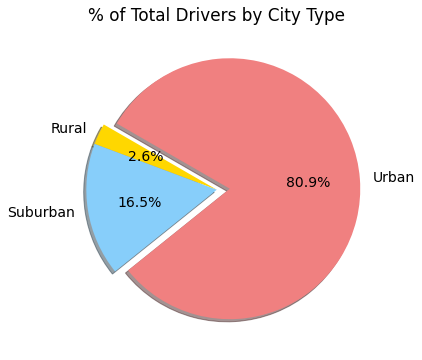

In [105]:
# Build the percentage of rides by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents, 
        labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], 
        explode = [0, 0, 0.1], 
        autopct = '%1.1f%%', 
        shadow = True, startangle = 150)
plt.title('% of Total Drivers by City Type')

# Change the defualt font size
mpl.rcParams['font.size']= 14

# Save and show the image
plt.savefig('Analysis/Fig7.png')
plt.show()